In [4]:
from PIL import Image, ImageFilter, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

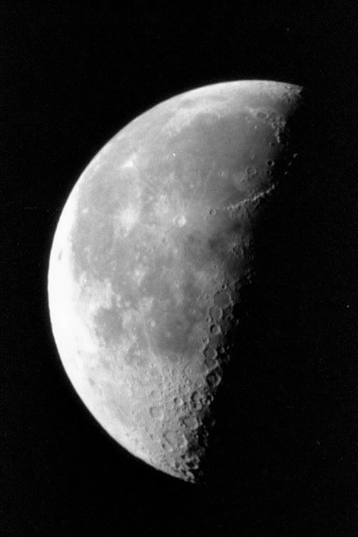

(358, 537)

In [5]:
im = Image.open("moon.tif")
display(im)
im.size

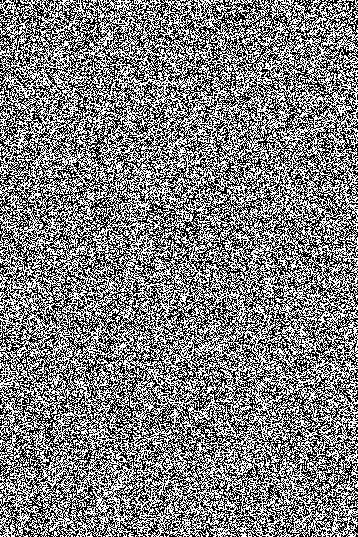

In [6]:
gauss_noise = Image.effect_noise((358, 537), 1000)
gauss_noise.save("gauss_noise.tif")
display(gauss_noise)

In [7]:
im = np.array(Image.open("moon.tif"))
gn = np.array(Image.open("gauss_noise.tif"))

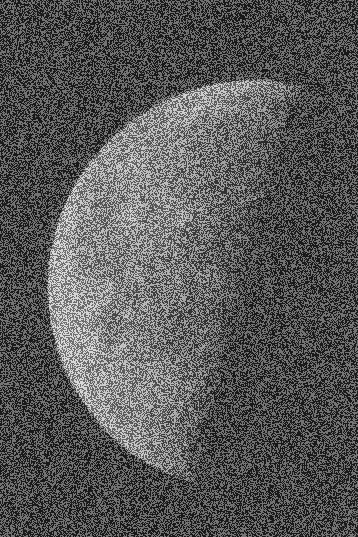

In [33]:
n = im * 0.5 + gn * 0.5
n =n /255
n_img = Image.fromarray(np.uint8(cm.plasma(n)*255))
# applying grayscale method
n_gray = ImageOps.grayscale(n_img)
n_gray.save("n_gray.tif")
display(n_gray)

<Figure size 432x288 with 0 Axes>

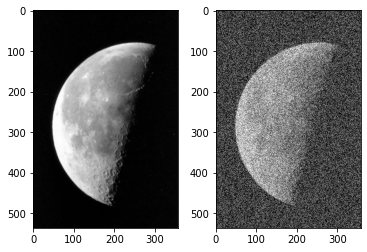

In [9]:
plt.figure()
f, axarr = plt.subplots(1,2)
axarr[0].imshow(im,'gray')
axarr[1].imshow(n,'gray')

In [24]:
kernel = np.array([[2.0,4.0,2.0], [4.0,8.0,4.0], [2.0,4.0,2.0]])
kernel = kernel / np.sum(kernel)
arraylist = []
for y in range(3):
    temparray = np.copy(n)
    temparray = np.roll(temparray, y - 1, axis=0)
    for x in range(3):
        temparray_X = np.copy(temparray)
        temparray_X = np.roll(temparray_X, x - 1, axis=1)*kernel[y,x]
        arraylist.append(temparray_X)

arraylist = np.array(arraylist)
s = np.sum(arraylist, axis=0)

<Figure size 432x288 with 0 Axes>

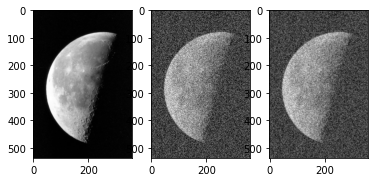

In [25]:
plt.figure()
f, axarr = plt.subplots(1,3)
axarr[0].imshow(im,'gray')
axarr[1].imshow(n,'gray')
axarr[2].imshow(s,'gray')

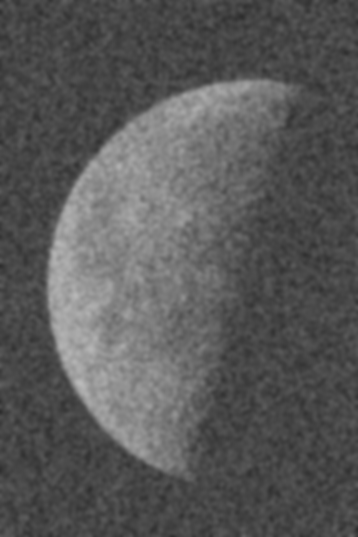

In [38]:
n_gray.filter(ImageFilter.GaussianBlur(radius = 2))
s_gray = n_gray.filter(ImageFilter.GaussianBlur(radius = 2))
s_gray.save("s_gray.tif")
display(s_gray)

In [13]:
kernel_sobel_X = np.array([[-1.0,0.0,1.0], [-2.0,0.0,2.0], [-1.0,0.0,1.0]])
#kernel_sobel = kernel_sobel / np.sum(kernel_sobel)
arraylist_sobel_X = []
for y in range(3):
    temparray_sobel_X = np.copy(n)
    temparray_sobel_X = np.roll(temparray_sobel_X, y - 1, axis=0)
    for x in range(3):
        temparray_X_sobel_X = np.copy(temparray_sobel_X)
        temparray_X_sobel_X = np.roll(temparray_X_sobel_X, x - 1, axis=1)*kernel_sobel_X[y,x]
        arraylist_sobel_X.append(temparray_X_sobel_X)

arraylist_sobel_X = np.array(arraylist_sobel_X)
arraylist_sum_sobel_X = np.sum(arraylist_sobel_X, axis=0)

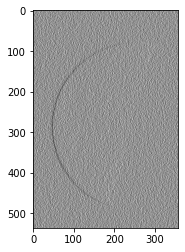

In [14]:
plt.imshow(arraylist_sum_sobel_X,'gray')

In [15]:
kernel_sobel_Y = np.array([[-1.0,-2.0,-1.0], [0.0,0.0,0.0], [1.0,2.0,1.0]])
#kernel_sobel = kernel_sobel / np.sum(kernel_sobel)
arraylist_sobel_Y = []
for y in range(3):
    temparray_sobel_Y = np.copy(n)
    temparray_sobel_Y = np.roll(temparray_sobel_Y, y - 1, axis=0)
    for x in range(3):
        temparray_X_sobel_Y = np.copy(temparray_sobel_Y)
        temparray_X_sobel_Y = np.roll(temparray_X_sobel_Y, x - 1, axis=1)*kernel_sobel_Y[y,x]
        arraylist_sobel_Y.append(temparray_X_sobel_Y)

arraylist_sobel_Y = np.array(arraylist_sobel_Y)
arraylist_sum_sobel_Y = np.sum(arraylist_sobel_Y, axis=0)

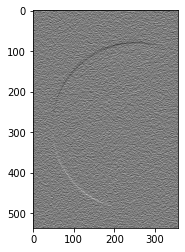

In [23]:
plt.imshow(arraylist_sum_sobel_Y,'gray')

<Figure size 432x288 with 0 Axes>

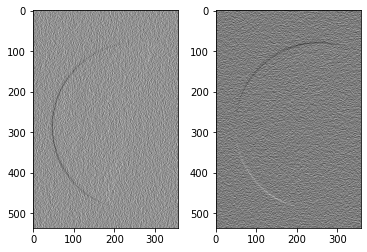

In [18]:
plt.figure()
f, axarr = plt.subplots(1,2)
axarr[0].imshow(arraylist_sum_sobel_X,'gray')
axarr[1].imshow(arraylist_sum_sobel_Y,'gray')

(array([[ 0.,  0.,  6., ..., 65., 20.,  2.],
        [ 0.,  0., 10., ..., 66., 26.,  1.],
        [ 0.,  0.,  9., ..., 75., 22.,  2.],
        ...,
        [ 0.,  0., 19., ..., 64., 26.,  8.],
        [ 0.,  0.,  5., ..., 70., 30.,  3.],
        [ 0.,  0.,  6., ..., 79., 45.,  9.]]),
 array([-3.40784314, -2.80960784, -2.21137255, -1.61313725, -1.01490196,
        -0.41666667,  0.18156863,  0.77980392,  1.37803922,  1.97627451,
         2.5745098 ]),
 <a list of 358 BarContainer objects>)

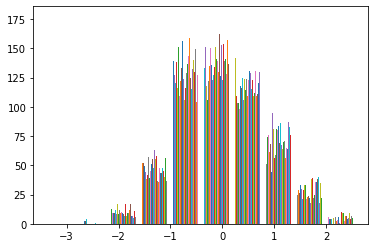

In [21]:
plt.hist(arraylist_sum_sobel_X)

(array([[ 0.,  7., 33., ..., 30.,  9.,  0.],
        [ 0., 11., 35., ..., 29.,  7.,  0.],
        [ 0.,  9., 34., ..., 25.,  4.,  0.],
        ...,
        [ 0.,  8., 42., ..., 34.,  6.,  0.],
        [ 0.,  8., 41., ..., 40.,  7.,  0.],
        [ 0.,  7., 35., ..., 34.,  5.,  0.]]),
 array([-2.78431373, -2.2145098 , -1.64470588, -1.07490196, -0.50509804,
         0.06470588,  0.6345098 ,  1.20431373,  1.77411765,  2.34392157,
         2.91372549]),
 <a list of 358 BarContainer objects>)

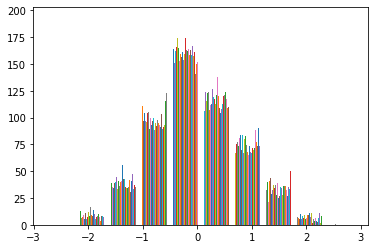

In [22]:
plt.hist(arraylist_sum_sobel_Y)

In [ ]:
image_file = image_file.convert('L')
# Threshold
image_file = image_file.point( lambda p: 255 if p > threshold else 0 )
# To mono
image_file = image_file.convert('1')

In [26]:
kernel_sobel_X = np.array([[-1.0,0.0,1.0], [-2.0,0.0,2.0], [-1.0,0.0,1.0]])
#kernel_sobel = kernel_sobel / np.sum(kernel_sobel)
arraylist_sobel_X = []
for y in range(3):
    temparray_sobel_X = np.copy(s)
    temparray_sobel_X = np.roll(temparray_sobel_X, y - 1, axis=0)
    for x in range(3):
        temparray_X_sobel_X = np.copy(temparray_sobel_X)
        temparray_X_sobel_X = np.roll(temparray_X_sobel_X, x - 1, axis=1)*kernel_sobel_X[y,x]
        arraylist_sobel_X.append(temparray_X_sobel_X)

arraylist_sobel_X = np.array(arraylist_sobel_X)
arraylist_sum_sobel_X = np.sum(arraylist_sobel_X, axis=0)

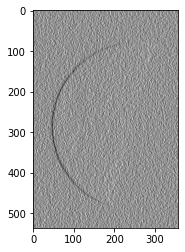

In [27]:
plt.imshow(arraylist_sum_sobel_X,'gray')

In [28]:
kernel_sobel_Y = np.array([[-1.0,-2.0,-1.0], [0.0,0.0,0.0], [1.0,2.0,1.0]])
#kernel_sobel = kernel_sobel / np.sum(kernel_sobel)
arraylist_sobel_Y = []
for y in range(3):
    temparray_sobel_Y = np.copy(n)
    temparray_sobel_Y = np.roll(temparray_sobel_Y, y - 1, axis=0)
    for x in range(3):
        temparray_X_sobel_Y = np.copy(temparray_sobel_Y)
        temparray_X_sobel_Y = np.roll(temparray_X_sobel_Y, x - 1, axis=1)*kernel_sobel_Y[y,x]
        arraylist_sobel_Y.append(temparray_X_sobel_Y)

arraylist_sobel_Y = np.array(arraylist_sobel_Y)
arraylist_sum_sobel_Y = np.sum(arraylist_sobel_Y, axis=0)

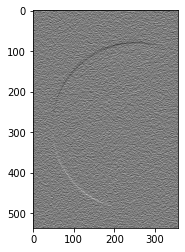

In [29]:
plt.imshow(arraylist_sum_sobel_Y,'gray')

<Figure size 432x288 with 0 Axes>

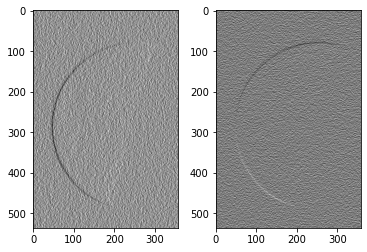

In [30]:
plt.figure()
f, axarr = plt.subplots(1,2)
axarr[0].imshow(arraylist_sum_sobel_X,'gray')
axarr[1].imshow(arraylist_sum_sobel_Y,'gray')

(array([[ 0.,  0.,  1., ..., 58.,  6.,  0.],
        [ 0.,  0.,  3., ..., 58.,  3.,  0.],
        [ 0.,  0.,  0., ..., 58.,  9.,  2.],
        ...,
        [ 0.,  0., 15., ..., 63., 19.,  0.],
        [ 0.,  0.,  0., ..., 73., 17.,  2.],
        [ 0.,  0.,  5., ..., 82., 16.,  2.]]),
 array([-1.91948529, -1.5821201 , -1.2447549 , -0.90738971, -0.57002451,
        -0.23265931,  0.10470588,  0.44207108,  0.77943627,  1.11680147,
         1.45416667]),
 <a list of 358 BarContainer objects>)

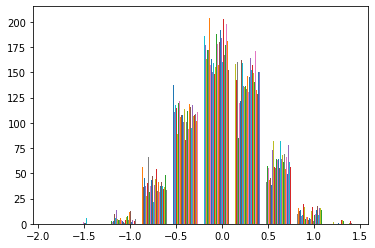

In [31]:
plt.hist(arraylist_sum_sobel_X)

(array([[ 0.,  7., 33., ..., 30.,  9.,  0.],
        [ 0., 11., 35., ..., 29.,  7.,  0.],
        [ 0.,  9., 34., ..., 25.,  4.,  0.],
        ...,
        [ 0.,  8., 42., ..., 34.,  6.,  0.],
        [ 0.,  8., 41., ..., 40.,  7.,  0.],
        [ 0.,  7., 35., ..., 34.,  5.,  0.]]),
 array([-2.78431373, -2.2145098 , -1.64470588, -1.07490196, -0.50509804,
         0.06470588,  0.6345098 ,  1.20431373,  1.77411765,  2.34392157,
         2.91372549]),
 <a list of 358 BarContainer objects>)

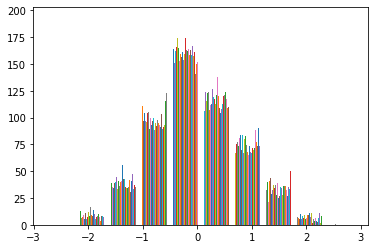

In [32]:
plt.hist(arraylist_sum_sobel_Y)

In [39]:
t_S = 100;
t_N = 50;

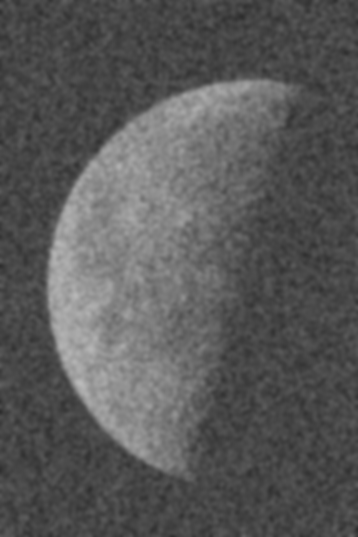

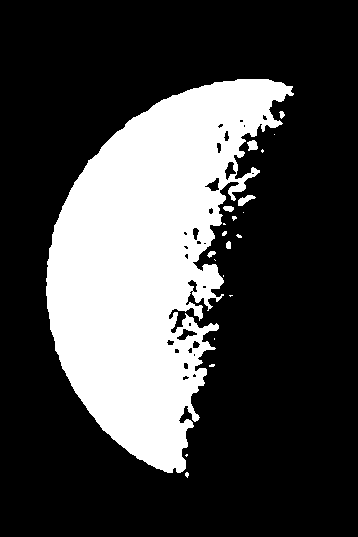

In [44]:
im_s=Image.open("s_gray.tif")
im_s2=im_s.convert("L")
im_s2.save("L.tif")
display(im_s2)
im_s =im_s2.point(lambda p: p > t_S and 255)
im_s.save("M_S.tif")
display(im_s)

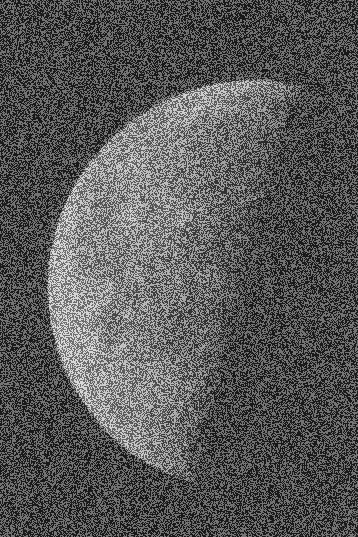

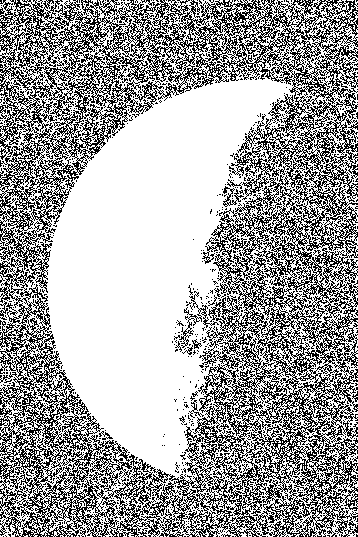

In [45]:
im_n=Image.open("n_gray.tif")
im_n2=im_n.convert("L")
im_n2.save("L.tif")
display(im_n2)
im_n =im_n2.point(lambda p: p > t_N and 255)
im_n.save("M_N.tif")
display(im_n)